In [52]:
import numpy as np 
import matplotlib.pyplot as plt 


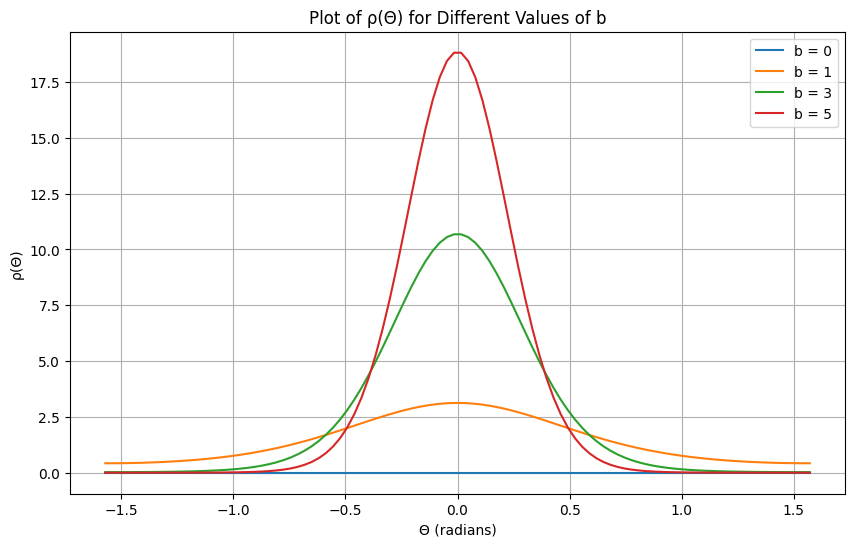

In [53]:
from scipy.special import erfi

# Define the function rho(Theta) based on the provided equations
def rho(theta, b):
    
    numerator = 4 * np.sqrt(b / (2 * np.pi)) * np.exp(b * (np.cos(2 * theta) + 1))
    if b!=0:
        denominator = erfi(np.sqrt(2 * b))
    else:
        denominator=1
    return numerator / denominator

# Define a range of theta values from 0 to 2π
theta = np.linspace(-np.pi/2, np.pi/2, 100)

# Define different values of b to plot
b_values = [0, 1, 3,5]

# Plot rho(Theta) for different values of b
plt.figure(figsize=(10, 6))
for b in b_values:
    plt.plot(theta, rho(theta, b), label=f'b = {b}')

plt.title('Plot of ρ(Θ) for Different Values of b')
plt.xlabel('Θ (radians)')
plt.ylabel('ρ(Θ)')
plt.legend()
plt.grid(True)
plt.savefig('./pics/b_theta.pdf')
plt.show()



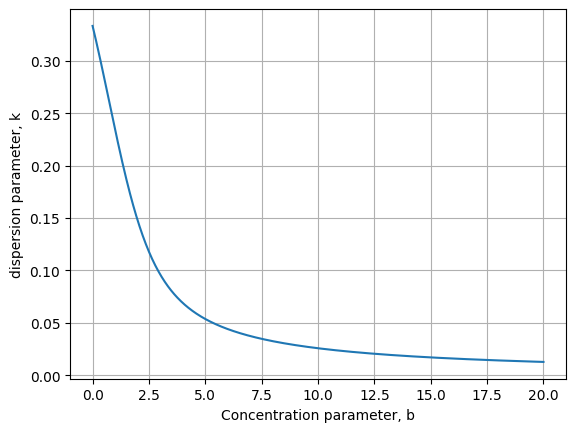

In [54]:
from scipy.integrate import quad

# Function to be integrated for kappa
def integrand(theta, b):
    return rho(theta, b) * np.sin(theta)**3

# Calculate kappa for different values of b
b_values = np.linspace(0.000000001,20,1000)
kappa_values = []

for b in b_values:
    # Perform numerical integration
    kappa, _ = quad(integrand, 0, np.pi, args=(b,))
    kappa = kappa / 4  # scaling factor as per the equation
    kappa_values.append(kappa)

plt.plot(b_values,kappa_values)
plt.xlabel('Concentration parameter, b')
plt.grid(True)
plt.ylabel('dispersion parameter, k')
plt.savefig('./pics/kappa_b.pdf')

In [55]:
import pandas as pd

In [56]:
DataFrame=pd.read_csv('./data.csv')
DataFrame


,DIC,DIC2D,DIC2D.1,DIC2D.2,DIC2D.3,DIC2D.4,DIC2D.5,DIC2D.6,DIC2D.7,Log(Force 1),Log(Force 2),Log(Force 3),Log(Force 4),Log(Displacement 1),Log(Displacement 2),Log(Displacement 3),Log(Displacement 4),
0,Frame Id,Location u [pix],Location u [pix],Location u [pix],Location u [pix],Location v [pix],Location v [pix],Location v [pix],Location v [pix],Force 1,Force 2,Force 3,Force 4,Displacement 1,Displacement 2,Displacement 3,Displacement 4,
1,NaN,s0,s1,s2,s3,s0,s1,s2,s3,N,N,N,N,mm,mm,mm,mm,
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1559.585813,1553.741541,1412.644109,1402.625357,1294.164038,1478.706625,1450.315457,1291.798107,0.10061,0.02826,0.00524,0.05785,0.00368,0.00401,0.00499,0.0142,
4,2,1559.708498,1553.877931,1412.831641,1402.705853,1294.056155,1478.661087,1450.034011,1291.78907,0.10389,0.03155,0.00688,0.05621,0.00039,0.00434,0.00434,0.00828,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,550,1584.570361,1553.220319,1394.087741,1366.487721,1341.932798,1600.490575,1530.933444,1332.198172,5.18464,4.29675,5.10901,4.52365,4.50928,4.99269,4.49547,4.99861,
553,551,1584.513656,1553.239681,1394.081244,1366.475637,1342.060295,1600.714695,1531.085507,1332.212609,5.24877,4.37403,5.16985,4.596,4.52309,5.0065,4.50928,5.01275,
554,552,1584.86932,1553.649015,1394.361475,1366.706303,1341.87463,1600.674964,1531.077444,1332.205085,5.26028,4.39211,5.18958,4.61902,4.52539,5.01144,4.50796,5.01736,
555,553,1584.605407,1553.764137,1394.326758,1366.624568,1341.788098,1600.489383,1530.941468,1331.921434,5.32605,4.45953,5.25206,4.68643,4.53559,5.02624,4.5221,5.03183,


In [57]:
dis_1=pd.to_numeric(DataFrame[' Log(Displacement 1)'], errors='coerce')/1000
f_1=pd.to_numeric(DataFrame[' Log(Force 1)'], errors='coerce')

dis_2=pd.to_numeric(DataFrame[' Log(Displacement 2)'], errors='coerce')/1000
f_2=pd.to_numeric(DataFrame[' Log(Force 2)'], errors='coerce')

dis_3=pd.to_numeric(DataFrame[' Log(Displacement 3)'], errors='coerce')/1000
f_3=pd.to_numeric(DataFrame[' Log(Force 3)'], errors='coerce')

dis_4=pd.to_numeric(DataFrame[' Log(Displacement 4)'], errors='coerce')/1000
f_4=pd.to_numeric(DataFrame[' Log(Force 4)'], errors='coerce')

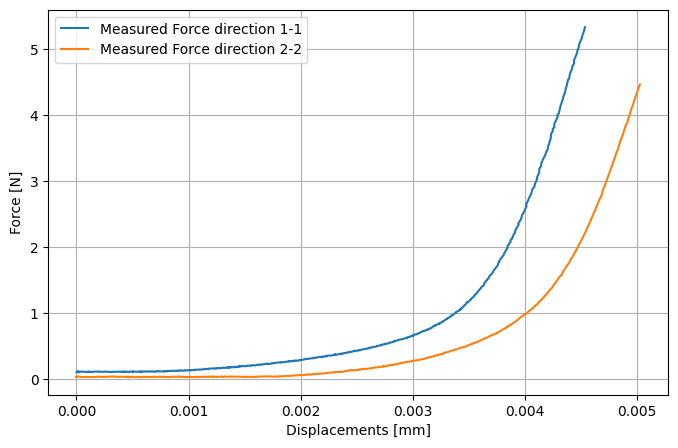

In [58]:

plt.figure(figsize=(8,5))
plt.plot(dis_1,f_1,label='Measured Force direction 1-1')
plt.plot(dis_2,f_2,label='Measured Force direction 2-2')


plt.xlabel('Displacements [mm]')
plt.ylabel('Force [N]')

plt.legend()

plt.grid(True)
plt.savefig('./pics/force.pdf')

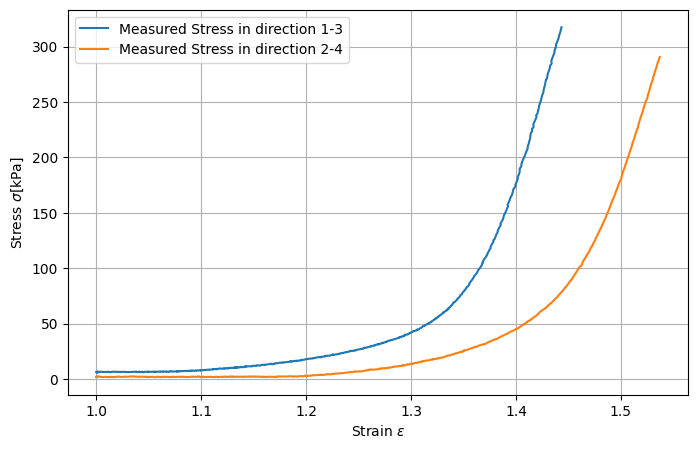

In [59]:
dis_13=10.23*10**(-3)   #10.23mm
dis_24=9.36*10**(-3)     #9.36mm
thickness=1.64*10**(-3)
A_13=thickness*dis_13*10**3
A_24=thickness*dis_24*10**3


plt.figure(figsize=(8,5))
plt.plot(1+(dis_1)/dis_13,f_1/A_13,label='Measured Stress in direction 1-3')
plt.plot(1+dis_2/dis_24,f_2/A_24,label='Measured Stress in direction 2-4')
# plt.plot(dis_3/dis_13,f_3/A_13,label='3')
# plt.plot(dis_4/dis_24,f_4/A_24,label='4')

plt.xlabel('Strain '+r'$\varepsilon$')
plt.ylabel('Stress '+r'$\sigma$'+'[kPa]')

plt.legend()

plt.grid(True)
plt.savefig('./pics/stress.pdf')

In [60]:
dis_1=dis_1.dropna()
dis_2=dis_2.dropna()

In [61]:
dis=[1+dis_1/dis_13,1+dis_2/dis_24]

dis2=dis[1]

f_1=f_1.dropna()
f_2=f_2.dropna()

In [62]:
def sigmaB(dis1,c,k1,k2,dis2,args):
    
    la1=np.array(dis1)

    la2=np.array(dis2)

    theta,k,i,j=args

    I=[[1,0,0],[0,1,0],[0,0,1]]

    I1=la1**2+la2**2+1/(la1*la2)

    I41=(np.cos(theta))**2*la1**2+(np.sin(theta))**2*la2**2

    m=[la1*np.cos(theta),la2*np.sin(theta),0]
    m_=[la1*np.cos(theta),-la2*np.sin(theta),0]

    b=[[la1**2,0,0],[0,la2**2,0],[0,0,1/(la1*la2)]]

    I14=k1*(np.exp(k2*(k*I1+(1-3*k)*I41-1)**2))*(k*I1+(1-3*k)*I41-1)*k

    psi4b=I14*(1-3*k)

    psi1b=c+4*I14*k

    pb=-2*(psi1b*b[2][2])


    sigmaB_11=2*(psi1b*b[i][j]+psi4b*m[i]*m[j]+psi4b*m_[i]*m_[j])+pb*I[i][j]
    
    
    return sigmaB_11

In [63]:
def sigmaA(dis1,c,k1,k2,dis2,args):

    psi1=c/2

    la1=np.array(dis1)

    la2=np.array(dis2)

    theta,i,j=args

    I=[[1,0,0],[0,1,0],[0,0,1]]

    m=[la1*np.cos(theta),la2*np.sin(theta),0]
    m_=[la1*np.cos(theta),-la2*np.sin(theta),0]

    b=[[la1**2,0,0],[0,la2**2,0],[0,0,1/(la1*la2)]]

    pa=-2*psi1*b[2][2]

    I41=(np.cos(theta))**2*la1**2+(np.sin(theta))**2*la2**2

    psi4A=(k1)*(I41-1)*np.exp(k2*(I41-1)**2)

    sigmaA=2*(psi1*b[i][j]+psi4A*m[i]*m[j]+psi4A*m_[i]*m_[j])+pa*I[i][j]

    return sigmaA

In [64]:
kappa=0.26
theta=np.pi/6

In [65]:
from scipy.optimize import curve_fit

def fitting_func(dis, c, k1, k2, args=[theta,kappa,0,0]):
    return np.array(sigmaB(dis, c, k1, k2, dis2, args))

initial_guess=[7.64, 100, 1.6]

params, _ = curve_fit(fitting_func, dis[0], f_1/A_13, p0=initial_guess)

# Extracting fitted parameters
c_fit, k1_fit, k2_fit = params
print("Fitted Parameters: c =", c_fit, "k1 =", k1_fit, "k2 =", k2_fit)

Fitted Parameters: c = 3.9611183100445424 k1 = 41.84508106862842 k2 = 3.8269215239602725


In [66]:
def fitting_funca(dis, c, k1, k2, args=[theta,0,0]):
    return np.array(sigmaA(dis, c, k1, k2, dis2, args))

initial_guess=[c_fit,k1_fit,k2_fit]

paramsa, _ = curve_fit(fitting_funca, dis[0], f_1/A_13, p0=initial_guess)

# Extracting fitted parameters
c_fita, k1_fita, k2_fita = paramsa
print("Fitted Parameters: c =", c_fita, "k1 =", k1_fita, "k2 =", k2_fita)

Fitted Parameters: c = 5.671223770799812 k1 = 3.896399913822921 k2 = 1.853643776965365


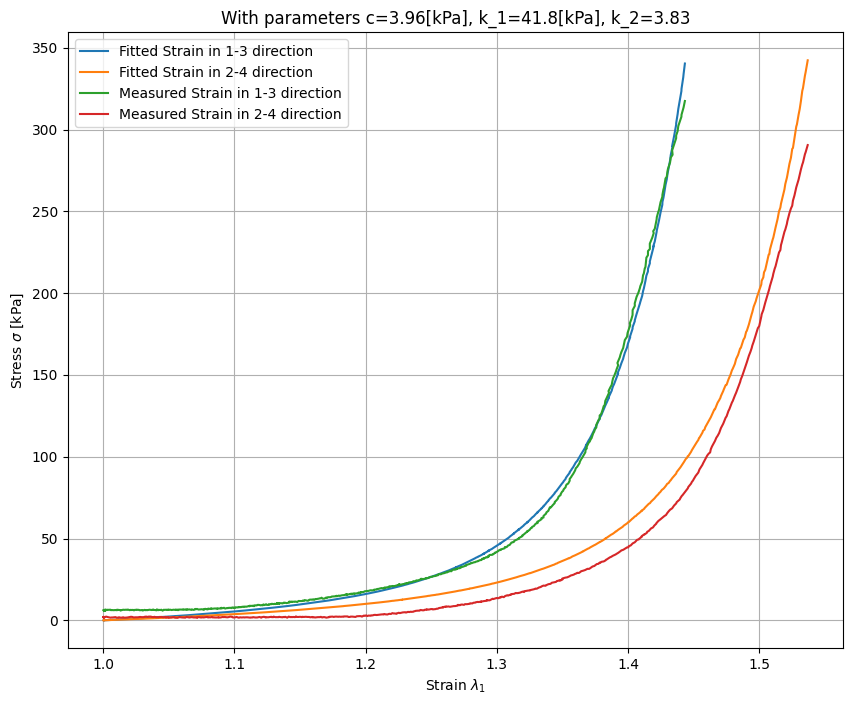

In [67]:
c=c_fit
k1=k1_fit
k2=k2_fit


args1=[theta,kappa,0,0]

testb=sigmaB(dis[0],c,k1,k2,dis[1],args1)

plt.figure(figsize=(10,8))
plt.title('With parameters c='+str(round(c_fit,2))+'[kPa], k_1='+str(round(k1_fit,1))+'[kPa], k_2='+str(round(k2_fit,2)))

plt.plot(dis[0],testb,label='Fitted Strain in 1-3 direction')

args2=[theta,kappa,1,1]

test=sigmaB(dis[1],c,k1,k2,dis[0],args2)

plt.plot(dis[1],test,label='Fitted Strain in 2-4 direction')

plt.plot(dis[0],f_1/A_13,label='Measured Strain in 1-3 direction')
plt.plot(dis[1],f_2/A_24,label='Measured Strain in 2-4 direction')

plt.grid(True)
plt.xlabel('Strain '+r'$\lambda_1$')
plt.ylabel('Stress '+r'$\sigma$'+' [kPa]')
plt.legend()

plt.savefig('./pics/kappa.pdf')

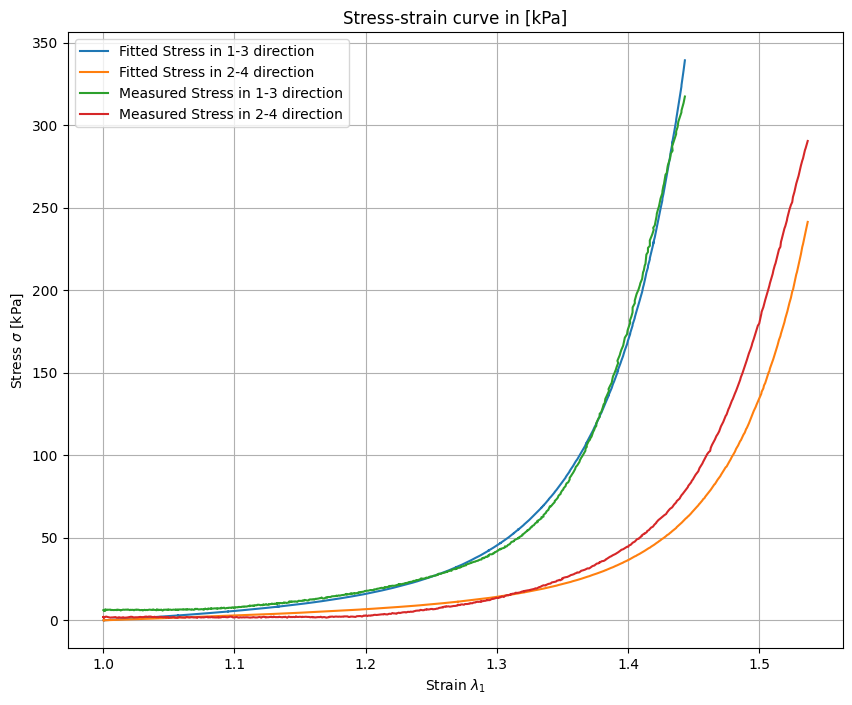

In [68]:
c=c_fita
k1=k1_fita
k2=k2_fita    

args1=[theta,0,0]

test=sigmaA(dis[0],c,k1,k2,dis[1],args1)


plt.figure(figsize=(10,8))
plt.title('Stress-strain curve in [kPa]')

plt.plot(dis[0],test,label='Fitted Stress in 1-3 direction')


args2=[theta,1,1]

test=sigmaA(dis[1],c,k1,k2,dis[0],args2)

plt.plot(dis[1],test,label='Fitted Stress in 2-4 direction')

plt.plot(dis[0],f_1/A_13,label='Measured Stress in 1-3 direction')
plt.plot(dis[1],f_2/A_24,label='Measured Stress in 2-4 direction')

plt.grid(True)
plt.xlabel('Strain '+r'$\lambda_1$')
plt.ylabel('Stress '+r'$\sigma$'+' [kPa]')
plt.legend()

plt.savefig('./pics/no_kappa.pdf')

In [69]:
kappa_values=np.linspace(0,1/3,5)
theta_values=np.linspace(0,np.pi/3,5)

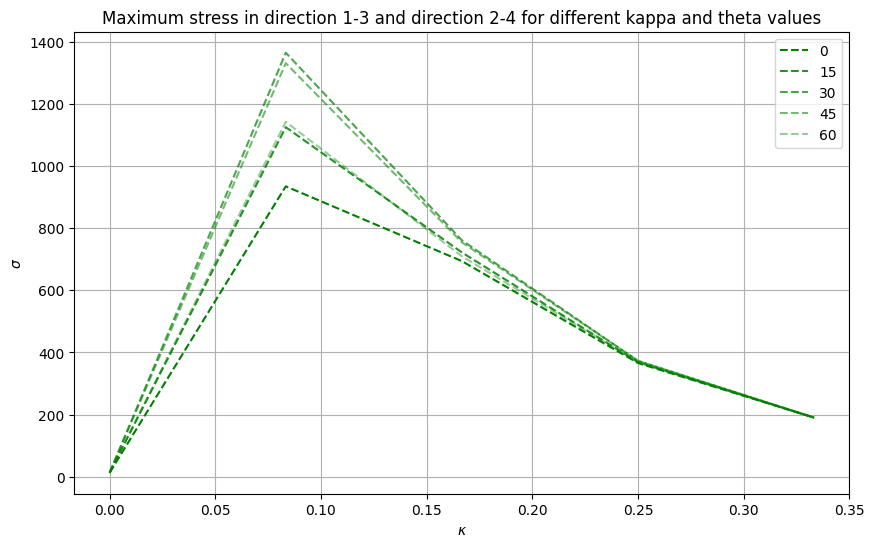

In [78]:
max_m_00=(f_1/A_13).max()
max_m_11=(f_1/A_24).max()

kappa_values=np.linspace(0.0,1/3,5)
theta_values=np.linspace(0,np.pi/3,5)

i=0
plt.figure(figsize=(10,6))
plt.title('Maximum stress in direction 1-3 and direction 2-4 for different kappa and theta values')
for theta in theta_values:
    alpha_value=1-0.15*i
    i+=1
    sigma_00_values=[]
    sigma_11_values=[]

    for kappa in kappa_values:   
        c = c_fit,
        k1 = k1_fit,
        k2 = k2_fit

        args1=[theta,kappa,0,0]
        sigma_b_00=sigmaB(dis[0],c,k1,k2,dis[1],args1)

        args2=[theta,kappa,1,1]
        sigma_b_11=sigmaB(dis[1],c,k1,k2,dis[0],args2)

        sigma_00_values.append(np.max(sigma_b_00))
        sigma_11_values.append(np.max(sigma_b_11))

        # plt.plot(kappa,np.max(sigma_b_00),'bo',alpha=alpha_value)
        # plt.plot(kappa,np.max(sigma_b_11),'go',alpha=alpha_value)


    # plt.plot(kappa_values,sigma_00_values,'b-',alpha=alpha_value,label=str(round(theta*180/np.pi)))
    plt.plot(kappa_values,sigma_11_values,'g--',alpha=alpha_value,label=str(round(theta*180/np.pi)))

# label='Theta='+str(round(theta*180/np.pi))

plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\sigma$')
plt.grid(True)
plt.legend()
plt.savefig('./pics/theta_22_dir_green_1.pdf')

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def von_mises_failure(sigma1_list, sigma2_list, input_value):
    """
    Calculate the von Mises stress for lists of stress values and check against a threshold.
    Stops calculation when von Mises stress surpasses the input value.

    :param sigma1_list: List of stress values in direction 1
    :param sigma2_list: List of stress values in direction 2
    :param input_value: Threshold value for von Mises stress
    :return: Index where failure occurs, or a message if no failure.
    """
    plt.figure()
    plt.title('Von Mises Stress Criterion')
    plt.xlabel('Stress in 1-3 direction [MPa]')
    plt.ylabel('Von Mises Stress [MPa]')
    plt.grid(True)

    for i, (sigma1, sigma2) in enumerate(zip(sigma1_list, sigma2_list)):
        von_mises_stress = np.sqrt(((sigma1 - sigma2)**2 + sigma1**2 + sigma2**2) / 2)
        von_mises_plot=von_mises_stress/input_value
        if von_mises_stress > input_value:
            plt.plot(sigma1/10**6, von_mises_plot, 'ro', label=f'Stress at failure: {round(sigma1/10**6, 3)} MPa')
            plt.legend()
            plt.savefig('./pics/von_mises_failure.pdf')
            return i  # Return the index of failure
        else:
            plt.plot(sigma1/10**6, von_mises_plot, 'bo')

    plt.show()
    return print('No failure detected')  # No failure detected


In [72]:
def tsai_hill_criterion(sigma_hh_list, sigma_zz_list, tau_hz_list, X, Y, S):
    """
    Calculate the modified Tsai-Hill failure criterion for lists of stress values.
    
    Stops calculation when K >= 1 for any data point.

    :return: Index where failure occurs, or None if no failure.
    """
    plt.figure()
    plt.title('Tsai-Hill failure criteria')
    plt.xlabel('Stress in 1-3 direction [MPa]')
    plt.ylabel(r'$\Lambda$')
    plt.grid(True)
    
    for i, (sigma_hh, sigma_zz, tau_hz) in enumerate(zip(sigma_hh_list, sigma_zz_list, tau_hz_list)):
        K = (sigma_hh / X)**2 + (sigma_zz / Y)**2 + (tau_hz / S)**2
        
        if K >= 1:
            plt.plot(sigma_hh/10**6,K,'ro',label=('Stress in fiber direction '+r'$\sigma_{f}=$'+str(round(sigma_hh/10**6,3))))
            plt.legend()
            plt.savefig('./pics/failure.pdf')
            return i  # Return the index of failure
        else:
            plt.plot(sigma_hh/10**6,K,'mo')
    
    return print('No failure detected')  # No failure detected
    
def hashin_rotem_criterion(sigma_hh_list, sigma_zz_list, tau_hz_list, X, Y, S):
    """
    Calculate the Hashin-Rotem failure criterion for lists of stress values.
    
    Stops calculation when K >= 1 for any data point.

    :return: Index where failure occurs, or None if no failure.
    """

    plt.figure()
    plt.title('Hasin-Rotem failure criteria')
    plt.xlabel('Stress in 1-3 direction [MPa]')

    plt.ylabel(r'$\Lambda$')
    plt.grid(True)

    for i, (sigma_hh, sigma_zz, tau_hz) in enumerate(zip(sigma_hh_list, sigma_zz_list, tau_hz_list)):
        Kf = sigma_hh / X
        Km = (sigma_zz / Y)**2 + (tau_hz / S)**2
        K = max(Kf, Km)
        if K >= 1:
            plt.plot(sigma_hh/10**6,Kf,'bo',label='Matrix')
            plt.plot(sigma_hh/10**6,Km,'go',label='Fiber')

            plt.plot(sigma_hh/10**6,K,'ro',label=('Stress in fiber direction '+r'$\sigma_{f}=$'+str(round(sigma_hh/10**6,3))))
            plt.legend()
            plt.savefig('./pics/failure_hasin.pdf')
            return i  # Return the index of failure
        else:
            plt.plot(sigma_hh/10**6,Kf,'bo')
            plt.plot(sigma_hh/10**6,Km,'go')

    return print('No failure detected')  # No failure detected

In [73]:
import numpy as np

def rotate_stress_tensor_lists(sigma_xx_list, sigma_xy_list, sigma_yx_list, sigma_yy_list, theta):
    """
    Rotate multiple 2D stress states represented by separate lists for each tensor component.

    :param sigma_xx_list: List of sigma_xx values.
    :param sigma_xy_list: List of sigma_xy values.
    :param sigma_yx_list: List of sigma_yx values.
    :param sigma_yy_list: List of sigma_yy values.
    :param theta: The rotation angle in radians.
    :return: Rotated stress components as four lists (sigma_xx', sigma_xy', sigma_yx', sigma_yy').
    """
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    # Rotation matrix for 2D stress
    R = np.array([[cos_theta, -sin_theta],
                  [sin_theta, cos_theta]])

    # Initialize lists for the rotated components
    rotated_sigma_xx = []
    rotated_sigma_xy = []
    rotated_sigma_yx = []
    rotated_sigma_yy = []

    for sigma_xx, sigma_xy, sigma_yx, sigma_yy in zip(sigma_xx_list, sigma_xy_list, sigma_yx_list, sigma_yy_list):
        sigma = np.array([[sigma_xx, sigma_xy], 
                          [sigma_yx, sigma_yy]])

        # Rotate the stress tensor
        rotated_sigma = R @ sigma @ R.T

        # Store the rotated components
        rotated_sigma_xx.append(rotated_sigma[0, 0])
        rotated_sigma_xy.append(rotated_sigma[0, 1])
        rotated_sigma_yx.append(rotated_sigma[1, 0])
        rotated_sigma_yy.append(rotated_sigma[1, 1])

    return rotated_sigma_xx, rotated_sigma_xy, rotated_sigma_yx, rotated_sigma_yy

880
878


881

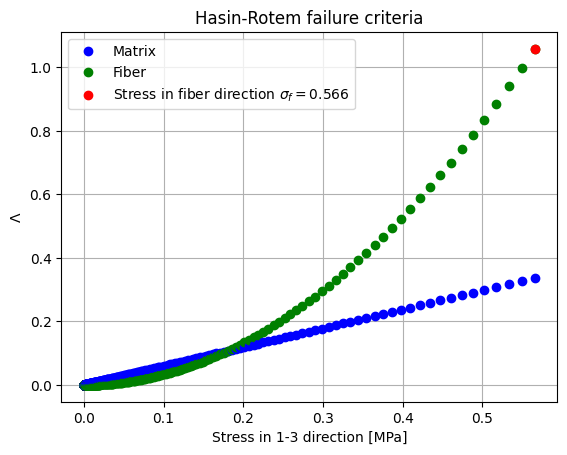

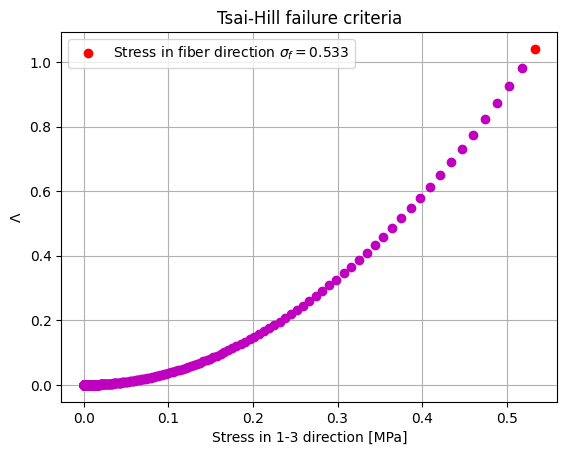

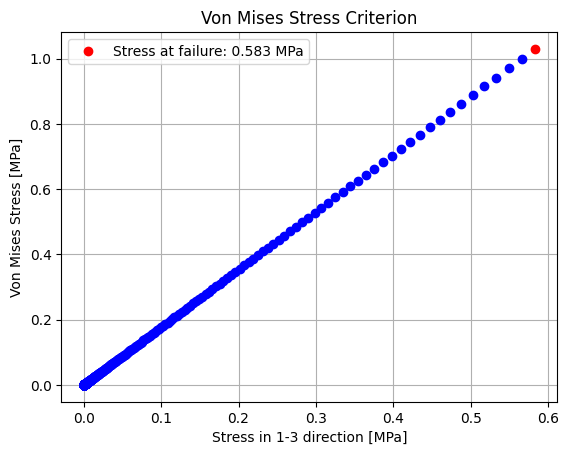

In [74]:
X,Y,S=1.68*10**6,0.55*10**6,0.42*10**6

sigma_matrix=[]

dis_1=np.linspace(1,2,1000)
dis_2=np.linspace(1,2,1000)

for i in range(2):
    for j in range(2):
        args=theta,kappa,i,j
        sigma_ij=sigmaB(dis_1,c_fit,k1_fit,k2_fit,dis_2,args)
        sigma_matrix.append(sigma_ij)

sigma_dir_13=rotate_stress_tensor_lists(sigma_matrix[0],sigma_matrix[1],sigma_matrix[2],sigma_matrix[3],theta)

print(hashin_rotem_criterion(sigma_dir_13[0], sigma_dir_13[3], sigma_dir_13[1], X, Y, S))

print(tsai_hill_criterion(sigma_dir_13[0], sigma_dir_13[3], sigma_dir_13[1], X, Y, S))

von_mises_failure(sigma_dir_13[0], sigma_dir_13[3], 0.566*10**6)



In [75]:
stress_strain_2=pd.read_csv('./Book1.csv')
stress_strain_2=stress_strain_2[:10]

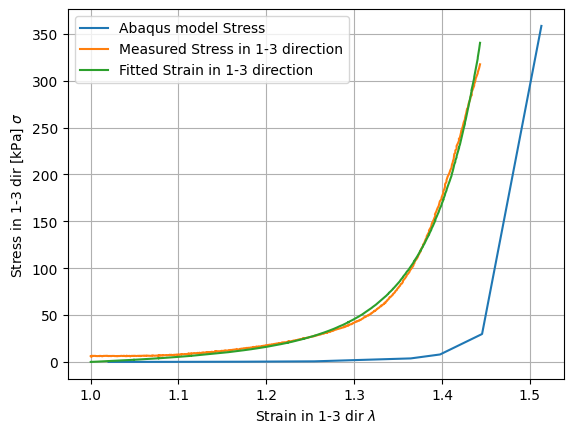

In [76]:
plt.plot(1+stress_strain_2['0'],stress_strain_2['0.1']/100,label='Abaqus model Stress')
plt.plot(dis[0],f_1/A_13,label='Measured Stress in 1-3 direction')
plt.plot(dis[0],testb,label='Fitted Strain in 1-3 direction')
plt.grid(True)
plt.xlabel('Strain in 1-3 dir'+r' $\lambda$')
plt.ylabel('Stress in 1-3 dir [kPa]'+r' $\sigma$')
plt.legend()
plt.savefig('./pics/abaqus_sim.pdf')